## Домашнее задание № 16. Визуализация.

Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

- Построить не менее 4 визуализаций различных видов;
- Каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
- По каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [2]:
df = pd.read_csv('DATA/IMDb movies.csv', low_memory=False) # описание фильмов
df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [3]:
df_rat = pd.read_csv('DATA/IMDb ratings.csv', low_memory=False) # рейтинг фильмов
dfr = df_rat[['imdb_title_id','weighted_average_vote','total_votes']].copy()
dfr.head()

,imdb_title_id,weighted_average_vote,total_votes
0,tt0000009,5.9,154
1,tt0000574,6.1,589
2,tt0001892,5.8,188
3,tt0002101,5.2,446
4,tt0002130,7.0,2237


In [4]:
# результирующий датафрейм 

dff = df.set_index('imdb_title_id').join(dfr.set_index('imdb_title_id'), how = 'inner', on = 'imdb_title_id')
dff = dff.reset_index()
dff.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0,5.9,154
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0,6.1,589
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0,5.8,188
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0,5.2,446
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0,7.0,2237


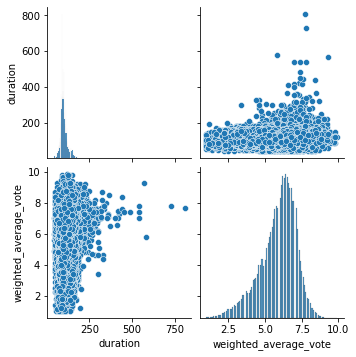

In [16]:
# построим pairplot для численных показателей, которые нас будут интересовать
sns.pairplot(dff[['duration', 'weighted_average_vote']])

In [6]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

## Визуализация № 1

### Количество оценок у топ-5 самых популярных жанров

In [7]:
vis_raw = dff[['genre','total_votes']]

In [8]:
%%time
# получаем список жанров с количеством оценок. Если у фильма несколько жанров - разбиваем построчно
vis_1sub = vis_raw['genre'].str.split(', ').apply(pd.Series)
vis_1sub.index = vis_raw.set_index(['total_votes']).index
vis_1sub = vis_1sub.stack().reset_index(['total_votes']).rename(columns={0: 'All Genres'})


Wall time: 28 s


In [9]:
# строим график

vis_1 = vis_1sub.groupby('All Genres').agg(['sum','count']).sort_values(by=('total_votes','count'), ascending = False).head()

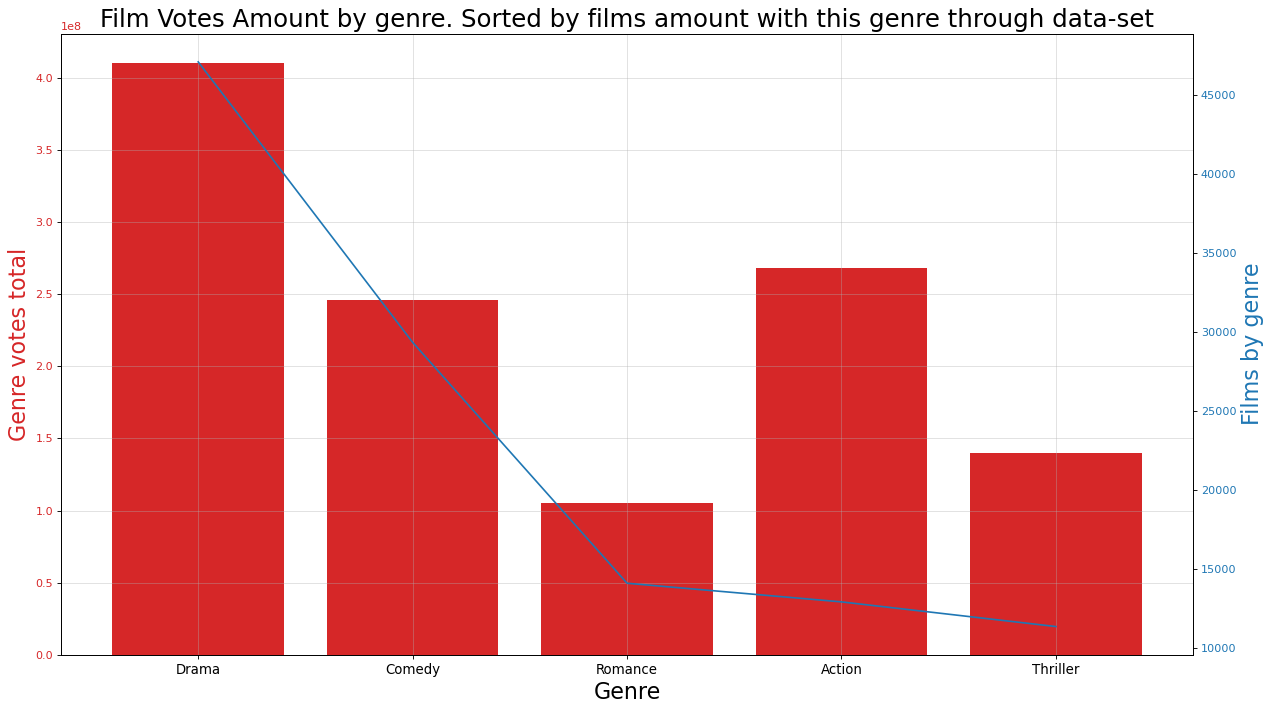

In [13]:
x = vis_1.reset_index()['All Genres']
y1 = vis_1.reset_index().total_votes['count']
y2 = vis_1.reset_index().total_votes['sum']

# # Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.bar(x, y2, color='tab:red')

# # Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y1, color='tab:blue')


# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Genre', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Genre votes total', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("Films by genre", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_title("Film Votes Amount by genre. Sorted by films amount with this genre through data-set", fontsize=22)
fig.tight_layout()
plt.show()

### Выводы по графику 1:
#### Судя по графику можно заметить интересную тенденцию, что хоть комедий и романтических фильмов больше в дата-сете, оценивают больше Action фильмы. Драма же вне конкуренции по обоим показателям. 

## Визуализация № 2

### Сравнение средневзвешенной оценки для фильмов снятых до 20х и после 20х в жанрах Drama, Comedy, Romance, Action, Thriller.


In [46]:
vis2_raw = dff[['year','genre','weighted_average_vote']]
vis2_raw.head()

,year,genre,weighted_average_vote
0,1894,Romance,5.9
1,1906,"Biography, Crime, Drama",6.1
2,1911,Drama,5.8
3,1912,"Drama, History",5.2
4,1911,"Adventure, Drama, Fantasy",7.0


In [47]:
# опять разбиваем записи по жанрам
vis_2sub = vis2_raw['genre'].str.split(', ').apply(pd.Series)
vis_2sub.index = vis2_raw.set_index(['year','weighted_average_vote']).index
vis_2sub = vis_2sub.stack().reset_index(['year','weighted_average_vote']).rename(columns={0: 'All Genres'})
vis_2sub.head()

,year,weighted_average_vote,All Genres
0,1894,5.9,Romance
0,1906,6.1,Biography
1,1906,6.1,Crime
2,1906,6.1,Drama
0,1911,5.8,Drama


In [49]:
# оставляем записи только по интересующим нас жанрам
vis_2sub = vis_2sub[vis_2sub['All Genres'].isin(['Drama', 'Comedy', 'Romance', 'Action', 'Thriller'])]
vis_2sub.head()

,year,weighted_average_vote,All Genres
0,1894,5.9,Romance
2,1906,6.1,Drama
0,1911,5.8,Drama
0,1912,5.2,Drama
1,1911,7.0,Drama


In [62]:
# делаем из столбца по городу числовой столбец
vis_2sub['year'] = vis_2sub['year'].replace('TV Movie 2019','2019')
vis_2sub2 = vis_2sub.astype({'year': 'int64'})

year                       int64
weighted_average_vote    float64
All Genres                object
dtype: object

In [63]:
# создаем флаг временного промежутка
vis_2sub2['year_flag'] = ['20s Century' if x < 2000 else '21st Century' for x in vis_2sub2['year']]

vis_2sub2.head()

,year,weighted_average_vote,All Genres,year_flag
0,1894,5.9,Romance,20s Century
2,1906,6.1,Drama,20s Century
0,1911,5.8,Drama,20s Century
0,1912,5.2,Drama,20s Century
1,1911,7.0,Drama,20s Century


In [77]:
# Создаем сводную таблицу для построения визуализации
vis_2 = vis_2sub2.pivot_table(
                        index='All Genres', 
                        columns='year_flag', 
                        values='weighted_average_vote', 
                        aggfunc=np.mean)

vis_2 = vis_2.reset_index()
vis_2

year_flag,All Genres,20s Century,21st Century
0,Action,5.837612,5.452273
1,Comedy,6.136228,5.638806
2,Drama,6.429877,6.082701
3,Romance,6.368935,5.923125
4,Thriller,5.813800,5.297761


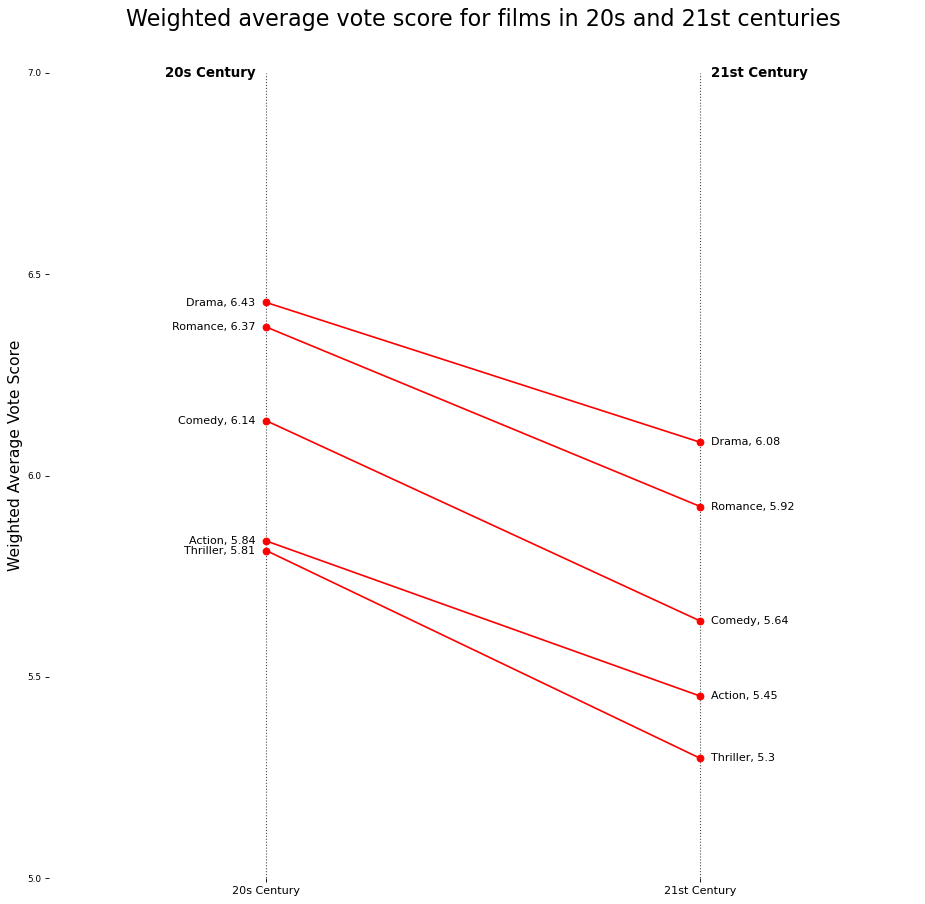

In [121]:
import matplotlib.lines as mlines

left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(vis_2['All Genres'], vis_2['20s Century'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(vis_2['All Genres'], vis_2['21st Century'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(vis_2['20s Century'], vis_2['21st Century'])]

def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=4, ymax=7, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=4, ymax=7, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=vis_2['20s Century'], x=np.repeat(1, vis_2.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=vis_2['21st Century'], x=np.repeat(3, vis_2.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(vis_2['20s Century'], vis_2['21st Century'], vis_2['All Genres']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1,2)), horizontalalignment='right', verticalalignment='center', fontdict={'size':10})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2,2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':10})

# 'Before' and 'After' Annotations
ax.text(1-0.05, 7, '20s Century', horizontalalignment='right', verticalalignment='center', fontdict={'size':12, 'weight':700})
ax.text(3+0.05, 7, '21st Century', horizontalalignment='left', verticalalignment='center', fontdict={'size':12, 'weight':700})

# Decoration
ax.set_title("Weighted average vote score for films in 20s and 21st centuries", fontdict={'size':20})
ax.set(xlim=(0,4), ylim=(5,7.1))
ax.set_xticks([1,3])
ax.set_xticklabels(["20s Century", "21st Century"])
ax.set_ylabel(ylabel='Weighted Average Vote Score', fontsize=14)
plt.yticks(np.arange(5, 7.5, 0.5), fontsize=8)



# # Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()


## Визуализация № 3 

### Динамика средневзвешенной оценки для года выпуска фильма

In [135]:
vis3_raw = dff[['year','weighted_average_vote']].copy()
vis3_raw.head()

,year,weighted_average_vote
0,1894,5.9
1,1906,6.1
2,1911,5.8
3,1912,5.2
4,1911,7.0


In [137]:
vis3_raw['year'] = vis3_raw['year'].replace('TV Movie 2019','2019')
vis3_raw = vis3_raw.astype({'year': 'int64'})

,year,weighted_average_vote
0,1894,5.9
1,1906,6.1
2,1911,5.8
3,1912,5.2
4,1911,7.0


In [142]:
vis3 = vis3_raw.groupby('year').mean().reset_index()
vis3.head()

,year,weighted_average_vote
0,1894,5.900000
1,1906,6.100000
2,1911,6.140000
3,1912,5.980000
4,1913,6.546154


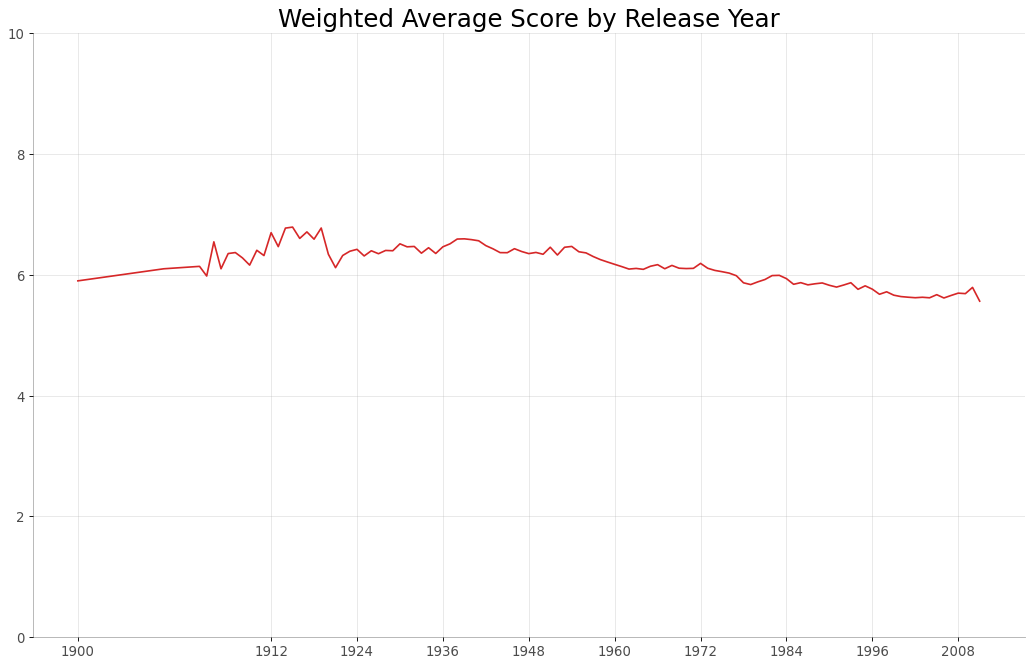

In [158]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('year', 'weighted_average_vote', data=vis3, color='tab:red')

# Decoration
plt.ylim(0, 10)
xtick_location = vis3.year.tolist()[::12]
xtick_labels = list(range(1900,2020,12))
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Weighted Average Score by Release Year", fontsize=22)
plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

### Выводы по графику 3:
#### Если судить только по средневзвешенной оценке по фильмам после 75 года оценки падают, но более чем очевидно, что это связано с тем, что фильмов попросту стали снимать больше. Интересны пики в начале 20го века их можно более детально исследовать

## Визуализация № 4

### Heatmap. Топ10 режессеров по количеству фильмов/Средняя оценка/Длительность фильма

In [159]:
dff.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0,5.9,154
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0,6.1,589
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0,5.8,188
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0,5.2,446
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0,7.0,2237


In [175]:
viz4_raw = dff[['director','duration','avg_vote']].copy().dropna().reset_index().drop(columns=['index'])
viz4_raw.head()

,director,duration,avg_vote
0,Alexander Black,45,5.9
1,Charles Tait,70,6.1
2,Urban Gad,53,5.8
3,Charles L. Gaskill,100,5.2
4,"Francesco Bertolini, Adolfo Padovan",68,7.0


In [177]:
vis_4sub = viz4_raw['director'].str.split(', ').apply(pd.Series)
vis_4sub.index = viz4_raw.set_index(['duration','avg_vote']).index
vis_4sub = vis_4sub.stack().reset_index(['duration','avg_vote']).rename(columns={0: 'director'})

In [180]:
conditions = [
    (vis_4sub['duration'] <= 30),
    (vis_4sub['duration'] <= 60),
    (vis_4sub['duration'] <= 90),
    (vis_4sub['duration'] <= 120),
    (vis_4sub['duration'] <= 150),
    (vis_4sub['duration'] > 150)]
choices = ['< 30m', '< 60m', '< 90m','< 120m','< 150m','More than 2.5h']
vis_4sub['duration_group'] = np.select(conditions, choices, default='error')

In [198]:
vis_4sub2 = vis_4sub[['director','avg_vote']].groupby('director').count().reset_index().sort_values('avg_vote', ascending=False).head(10)
dir_list = list(vis_4sub2['director'])


['Michael Curtiz',
 'Jesús Franco',
 'Lloyd Bacon',
 'Lesley Selander',
 'William Beaudine',
 'Richard Thorpe',
 'John Ford',
 'Jing Wong',
 'Gordon Douglas',
 'Raoul Walsh']

In [206]:
vis_4 = vis_4sub[vis_4sub['director'].isin(dir_list)].pivot_table(
                        index='duration_group', 
                        columns='director', 
                        values='avg_vote', 
                        aggfunc=np.mean).fillna(0).sort_values(by='duration_group')

vis_4

director,Gordon Douglas,Jesús Franco,Jing Wong,John Ford,Lesley Selander,Lloyd Bacon,Michael Curtiz,Raoul Walsh,Richard Thorpe,William Beaudine
duration_group,,,,,,,,,,
< 120m,6.225000,4.602941,5.735088,6.942424,5.900000,6.405263,6.832653,6.705405,6.353846,6.225000
< 150m,6.000000,0.000000,6.583333,7.455556,0.000000,7.000000,6.490909,6.883333,6.600000,0.000000
< 60m,6.600000,0.000000,0.000000,6.171429,6.500000,6.200000,5.766667,0.000000,0.000000,5.800000
< 90m,6.056522,4.667213,5.411111,6.213043,6.166154,6.198246,6.283333,6.287500,6.054286,5.837681
More than 2.5h,0.000000,0.000000,0.000000,6.950000,0.000000,0.000000,0.000000,7.700000,0.000000,0.000000


<AxesSubplot:xlabel='director', ylabel='duration_group'>

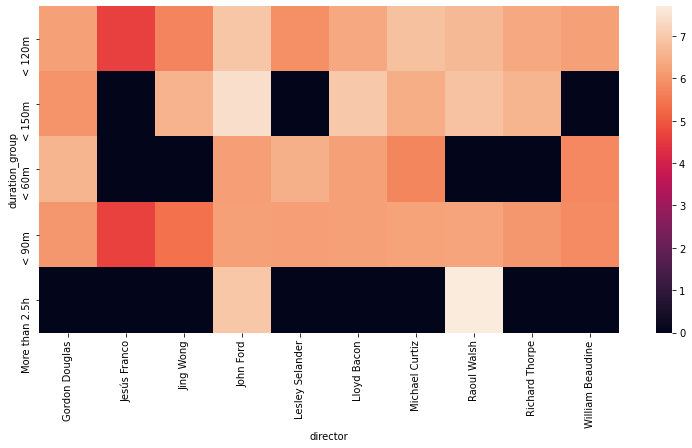

In [204]:
sns.heatmap(vis_4)

### Выводы по графику 4:
#### Только 2 из 10 авторов снимали фильмы длительностью более 2.5 часов и получили довольно высокие оценки. Фильмов, длительностью менее 30 минут в датафрейме вообще не представлено. Наибольшие средние оценки находятся в промежутке 2 часа - 2.5 часа.